Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 24s 495us/sample - loss: 0.4754 - accuracy: 0.8255 - val_loss: 0.3938 - val_accuracy: 0.8579
Epoch 2/5
48000/48000 [==============================] - 24s 503us/sample - loss: 0.3786 - accuracy: 0.8605 - val_loss: 0.3789 - val_accuracy: 0.8635
Epoch 3/5
48000/48000 [==============================] - 24s 495us/sample - loss: 0.3491 - accuracy: 0.8692 - val_loss: 0.3721 - val_accuracy: 0.8658
Epoch 4/5
48000/48000 [==============================] - 23s 489us/sample - loss: 0.3378 - accuracy: 0.8732 - val_loss: 0.3563 - val_accuracy: 0.8742
Epoch 5/5
10000/10000 [==============================] - 1s 126us/sample - loss: 0.3749 - accuracy: 0.8676
Test accuracy: 0.8676


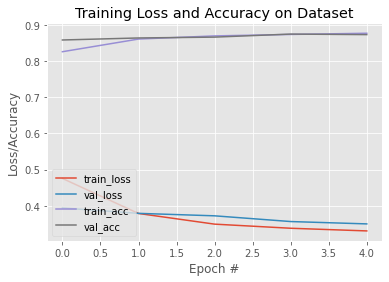

In [18]:
import tensorflow as tf
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, BatchNormalization
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras import backend as K
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt


NUM_EPOCHS =5
INIT_LR = 1e-2
BATCH_SIZE = 32

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

train_images = train_images / 255.0
test_images = test_images / 255.0

droprate = 0.5

num_classes =10
input_shape = (28,28,1)

if K.image_data_format() == "channels_first":
    train_images_cnn = train_images.reshape((train_images.shape[0], 1, 28, 28))
    test_images_cnn = test_images.reshape((test_images.shape[0], 1, 28, 28))
else:
    train_images_cnn = train_images.reshape((train_images.shape[0], 28, 28, 1))
    test_images_cnn = test_images.reshape((test_images.shape[0], 28, 28, 1))

img_input = tf.keras.Input(shape=(input_shape))

conv1 = tf.keras.layers.Conv2D(32, 3, activation='relu')(img_input)
#batch1 = tf.keras.layers.BatchNormalization()(conv1)
pooling1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)
#dropout1 = tf.keras.layers.Dropout(droprate)(pooling1)

conv2 = tf.keras.layers.Conv2D(64, 3, activation='relu')(pooling1)
#batch2 = tf.keras.layers.BatchNormalization()(conv2)
pooling2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)
#dropout2 = tf.keras.layers.Dropout(droprate)(pooling2)

flatten1 = tf.keras.layers.Flatten() (pooling2)

fc1 = tf.keras.layers.Dense(1000, activation='relu')(flatten1)
#batch3 = tf.keras.layers.BatchNormalization()(fc1)
#dropout3 = tf.keras.layers.Dropout(droprate)(batch3)
classification_utput = tf.keras.layers.Dense(num_classes, activation='softmax')(fc1)

model = tf.keras.models.Model(inputs=img_input, outputs=classification_utput)

opt = tf.optimizers.Adam(learning_rate=INIT_LR)

model.compile(optimizer= opt,loss='sparse_categorical_crossentropy',metrics=['accuracy'])

H = model.fit(train_images_cnn, train_labels, validation_split=0.2, batch_size=BATCH_SIZE,epochs=NUM_EPOCHS)

test_loss, test_acc = model.evaluate(test_images_cnn, test_labels)

print('Test accuracy:', test_acc)
predictions = model.predict(test_images_cnn)

predictions[0]

N = NUM_EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss") # no validation data for this example
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc") # no validation data for this example
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.show()
